In [1]:
from ema_workbench import load_results
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from vadere_ema_formulations import get_vadere_formulation


/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()


In [2]:
model = get_vadere_formulation(
    id=1,
    replications=1,
    model_file='baseCaseData.scenario'
)

In [3]:
experiments, outcomes = load_results('../data/output/EMA/sobolTest01.tar.gz')

In [4]:
def get_sobol_results(outcome):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes[outcome],
                   calc_second_order=True, print_to_console=False)
    print(Si)
    
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    plt.show()

In [5]:
def get_sobol_convergence(outcome, n_exp):
    problem = get_SALib_problem(model.uncertainties)
    s_data = pd.DataFrame(index=problem['names'],
                        columns=np.arange(20,n_exp,50)*(2*problem['num_vars']+2))
    for j in s_data.columns:
        scores = sobol.analyze(problem, outcomes[outcome][0:j], calc_second_order=True, print_to_console=False)
        s_data.loc[:,j] = scores['ST']
    fig, ax = plt.subplots(1)

    s_data.T.plot(ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Total index (ST)')
    plt.show()

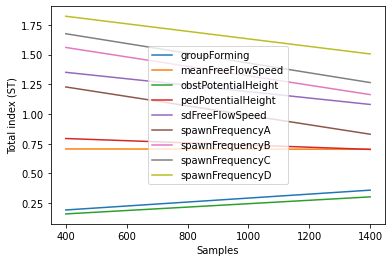

In [6]:
get_sobol_convergence('meanSpeed', 100)

{'S1': array([-0.08917214, -0.30750637, -0.09837798, -0.19851169, -0.22117833,
       -0.11537305, -0.18100534, -0.12469066, -0.16990707]), 'S1_conf': array([0.17133482, 0.25519261, 0.16268207, 0.31012979, 0.33710522,
       0.28980811, 0.35964412, 0.38086239, 0.37885903]), 'ST': array([0.35878677, 0.70331939, 0.30230927, 0.70188661, 1.08019771,
       0.82974832, 1.16306499, 1.26448584, 1.50532105]), 'ST_conf': array([0.25253058, 0.28789427, 0.20230783, 0.34008822, 0.44209155,
       0.36218797, 0.48146489, 0.50519703, 0.54677475]), 'S2': array([[       nan, 0.83523189, 0.41819512, 0.53011599, 0.22778537,
        0.05329339, 0.11256425, 0.68661006, 1.22473996],
       [       nan,        nan, 0.28637187, 0.3441265 , 0.86406898,
        0.69617823, 0.76229379, 1.28893831, 1.9591018 ],
       [       nan,        nan,        nan, 0.01977494, 0.1420422 ,
        0.01595441, 0.00364334, 0.5989918 , 1.28380229],
       [       nan,        nan,        nan,        nan, 0.16886113,
        0.2

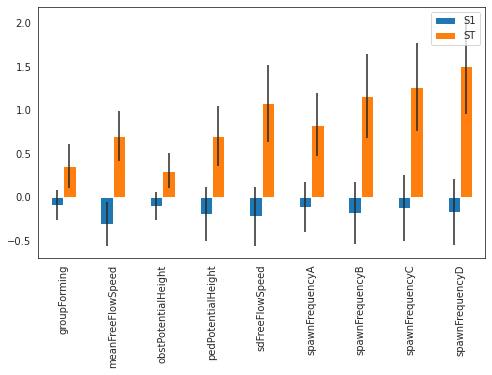

In [7]:
get_sobol_results('meanSpeed')